##Introduction
Children are heavily impacted by their environment, whether it is their home or physical location. In an ideal world, all students would have equal access to education and opportunities. It is important to determine which socioeconomic variables may be influencing a student’s road to success to work towards possible solutions on small and large scales. In this study, we will determine if the state a student is located in along with different socioeconomic factors will have an impact on their ACT performance using data from the National Center for Education Statistics and EdGap.


# Import libraries

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

##Load State ACT score data

In [167]:
# Get unique states from clean_df, sort them, and get the first one
first_state_alphabetically = sorted(clean_df['State'].unique())[0]

print(f"The first state alphabetically in clean_df is: {first_state_alphabetically}")

The first state alphabetically in clean_df is: Delaware


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving tabn226.60.xls to tabn226.60.xls
User uploaded file "tabn226.60.xls" with length 44032 bytes


Read the excel table

In [4]:
state_df = pd.read_excel("tabn226.60.xls")

Examine the data

In [7]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021  57 non-null     object 
 1   Unnamed: 1                                                                                            55 non-null     object 
 2   Unnamed: 2                                                                                            55 non-null     object 
 3   Unnamed: 3                                                                                            54 non-null     object 
 4   Unnamed: 4                                                                                            54 n

In [8]:
state_df.columns

Index(['Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [9]:
state_df.shape

(59, 13)

Remove unnecessary rows

In [10]:
state_df = pd.read_excel("tabn226.60.xls", skiprows=4, skipfooter=3, engine='xlrd')

Check if rows have been removed

In [11]:
state_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,United States,21.0,20.3,20.7,21.4,21.0,20.3,19.6,19.9,20.9,20.4,56.334392,35.301865
1,Alabama,19.2,18.9,18.4,19.7,19.4,18.7,18.4,18.0,19.2,18.8,100.000000,100.000000
2,Alaska,19.8,18.7,19.8,20.4,19.9,20.6,19.4,20.5,21.6,20.6,65.000000,16.000000
3,Arizona,19.7,18.6,19.8,20.1,19.8,19.8,18.6,19.8,20.3,19.9,62.000000,35.000000
4,Arkansas,19.4,18.9,19.0,19.7,19.5,19.0,18.6,18.3,19.3,19.2,100.000000,99.000000


In [12]:
state_df.tail(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13
42,South Dakota,21.8,20.7,21.5,22.3,22.0,21.6,20.5,21.2,22.4,21.9,80.0,55.0
43,Tennessee,19.8,19.5,19.2,20.1,19.9,19.1,18.7,18.5,19.7,19.1,100.0,100.0
44,Texas,20.7,19.5,20.7,21.1,20.9,20.1,18.9,20.0,20.6,20.3,45.0,23.0
45,Utah,20.3,19.5,19.9,20.8,20.6,20.6,19.7,20.1,21.3,20.8,100.0,86.0
46,Vermont,23.6,23.3,23.1,24.4,23.2,24.7,24.2,23.4,26.2,24.5,29.0,4.0
47,Virginia,23.8,23.5,23.3,24.6,23.5,25.5,25.5,24.5,26.5,25.1,29.0,9.0
48,Washington,21.9,20.9,21.9,22.1,22.0,23.6,22.9,23.1,24.4,23.4,29.0,7.0
49,West Virginia,20.4,20.0,19.4,21.2,20.5,20.8,20.6,19.6,21.8,20.8,69.0,30.0
50,Wisconsin,20.5,19.7,20.4,20.6,20.9,20.0,18.9,19.9,20.3,20.4,100.0,96.0
51,Wyoming,20.2,19.4,19.8,20.8,20.6,19.8,18.6,19.4,20.7,20.2,100.0,91.0


In [13]:
state_df.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

Add labels to the columns

In [14]:
state_df.rename(columns={
    1: "State",
    2: "Composite Score 2017",
    3: "English 2017",
    4: "Math 2017",
    5: "Reading 2017",
    6: "Science 2017",
    7: "Composite Score 2021",
    8: "English 2021",
    9: "Math 2021",
    10: "Reading 2021",
    11: "Science 2021",
    12: "Percent Taking 2017",
    13: "Percent Taking 2021",
}, inplace=True)

In [15]:
state_df.columns

Index(['State', 'Composite Score 2017', 'English 2017', 'Math 2017',
       'Reading 2017', 'Science 2017', 'Composite Score 2021', 'English 2021',
       'Math 2021', 'Reading 2021', 'Science 2021', 'Percent Taking 2017',
       'Percent Taking 2021'],
      dtype='object')

Tidy the data. Drop unnecessary columns

In [17]:
state_df.drop(columns=['English 2017', 'Math 2017',
       'Reading 2017', 'Science 2017', 'English 2021',
       'Math 2021', 'Reading 2021', 'Science 2021', 'Percent Taking 2017',
       'Percent Taking 2021'], inplace=True)

state_df.dropna(axis=1, how='all', inplace=True)

# Check
print(state_df.columns)

Index(['State', 'Composite Score 2017', 'Composite Score 2021'], dtype='object')


Melting the data into a tidy format

In [18]:
tidy_state_df = state_df.melt(
    id_vars=["State"],
    var_name="Subject_Year",
    value_name="Score"
)

In [19]:
tidy_state_df[['Subject', 'Year']] = tidy_state_df['Subject_Year'].str.rsplit(' ', n=1, expand=True)
tidy_state_df.drop(columns='Subject_Year', inplace=True)

In [20]:
tidy_state_df['State'].unique()

array(['   United States ', 'Alabama ', 'Alaska ', 'Arizona ',
       'Arkansas ', 'California ', 'Colorado ', 'Connecticut ',
       'Delaware ', 'District of Columbia ', 'Florida ', 'Georgia ',
       'Hawaii ', 'Idaho ', 'Illinois ', 'Indiana ', 'Iowa ', 'Kansas ',
       'Kentucky ', 'Louisiana ', 'Maine ', 'Maryland ', 'Massachusetts ',
       'Michigan ', 'Minnesota ', 'Mississippi ', 'Missouri ', 'Montana ',
       'Nebraska ', 'Nevada ', 'New Hampshire ', 'New Jersey ',
       'New Mexico ', 'New York ', 'North Carolina ', 'North Dakota ',
       'Ohio ', 'Oklahoma ', 'Oregon ', 'Pennsylvania ', 'Rhode Island ',
       'South Carolina ', 'South Dakota ', 'Tennessee ', 'Texas ',
       'Utah ', 'Vermont ', 'Virginia ', 'Washington ', 'West Virginia ',
       'Wisconsin ', 'Wyoming '], dtype=object)

Save the cleaned data

In [21]:

tidy_state_df.to_csv("tidy_state_data.csv", index=False)

In [22]:
tidy_state_df.head()

,State,Score,Subject,Year
0,United States,21.0,Composite Score,2017
1,Alabama,19.2,Composite Score,2017
2,Alaska,19.8,Composite Score,2017
3,Arizona,19.7,Composite Score,2017
4,Arkansas,19.4,Composite Score,2017


In [23]:
from google.colab import files
files.download("tidy_state_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load clean data from our class

## Load the data

In [24]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/education/refs/heads/main/education_clean.csv'
)

# Drop rows where the 'state' column is NaN
df.dropna(subset=['state'], inplace=True)

In [25]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


Load the state data

In [90]:
state_df = pd.read_csv("tidy_state_data.csv")

#Join the data frames

In [107]:
# Get unique state abbreviations from the original df
unique_df_states = temp_df['state'].dropna().unique()

# Get keys from the state_map dictionary (excluding the 'United States ' value from state_df if it was included in the map)
# Assuming state_map is defined in cell HOS9zx04Q7j2 or a similar cell
state_map_keys = list(state_map.keys())

print("Unique State Abbreviations in original df:")
print(unique_df_states)

print("\nKeys in state_map dictionary:")
print(state_map_keys)

Unique State Abbreviations in original df:
['DE' 'FL' 'GA' 'IL' 'IN' 'KY' 'LA' 'MA' 'MI' 'MO' 'NJ' 'NY' 'NC' 'OH'
 'PA' 'TN' 'TX' 'WA' 'WI' 'WY']

Keys in state_map dictionary:
['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']


In [108]:
# Load the data and drop rows with NaN states
df = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/education/refs/heads/main/education_clean.csv'
)
df.dropna(subset=['state'], inplace=True)

# Rename the state column
df.rename(columns={"state": "State"}, inplace=True)

# Remove leading/trailing whitespace from the 'State' column in state_df
state_df['State'] = state_df['State'].str.strip()

# Display unique states in state_df after cleaning to verify
print("Unique States in state_df after stripping whitespace:")
print(state_df['State'].unique())

# Define the state mapping dictionary and map state abbreviations to full names
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
df['State'] = df['State'].map(state_map)

# Extract the second year from the 'year' column and filter for 2017
df['Year'] = df['year'].str.split('-').str[1].astype(int)
df_filtered_years = df[df['Year'] == 2017]

# Perform the inner merge
merged_df = pd.merge(df_filtered_years, state_df, on=["State", "Year"], how="inner")
display(merged_df.head())
print("\nMerged DataFrame Shape:")
print(merged_df.shape)

Unique States in state_df after stripping whitespace:
['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,State,zip_code,school_type,school_level,charter,Year,Score,Subject
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,Delaware,19804,Regular School,High,Yes,2017,24.1,Composite Score
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,Delaware,19709,Regular School,High,No,2017,24.1,Composite Score
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,Delaware,19709,Regular School,High,No,2017,24.1,Composite Score
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,Delaware,19958,Regular School,High,No,2017,24.1,Composite Score
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,Delaware,19934,Regular School,High,No,2017,24.1,Composite Score



Merged DataFrame Shape:
(7227, 16)


I chose to do an inner join to keep data from all of the states that were included in the provided education dataset. I also associated each composite score from 2017 and 2021 in my state data set with the states given in the education dataset.

Check if data was properly merged

In [110]:
merged_df.tail()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,State,zip_code,school_type,school_level,charter,Year,Score,Subject
7222,560530200294,0.034549,0.590780,0.720077,64891.0,18.5,0.232156,2016-2017,Wyoming,82901,Regular School,High,No,2017,20.2,Composite Score
7223,560569000311,0.069538,0.633860,0.808841,44603.0,22.3,0.083871,2016-2017,Wyoming,82833,Regular School,High,No,2017,20.2,Composite Score
7224,560569500360,0.035159,0.764566,0.776570,44896.0,21.5,0.184829,2016-2017,Wyoming,82801,Regular School,High,No,2017,20.2,Composite Score
7225,560576200324,0.063877,0.670532,0.879324,92134.0,19.7,0.112583,2016-2017,Wyoming,82935,Regular School,High,No,2017,20.2,Composite Score
7226,560583000335,0.033553,0.736511,0.821128,73849.0,21.8,0.163701,2016-2017,Wyoming,83001,Regular School,High,No,2017,20.2,Composite Score


In [112]:
merged_df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,State,zip_code,school_type,school_level,charter,Year,Score,Subject
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,Delaware,19804,Regular School,High,Yes,2017,24.1,Composite Score
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,Delaware,19709,Regular School,High,No,2017,24.1,Composite Score
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,Delaware,19709,Regular School,High,No,2017,24.1,Composite Score
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,Delaware,19958,Regular School,High,No,2017,24.1,Composite Score
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,Delaware,19934,Regular School,High,No,2017,24.1,Composite Score


Data is now joined and tidy! Export data

In [113]:

merged_df.to_csv("cleaned_merged_data.csv", index=False)

# Exploratory data analysis

In [114]:
clean_df = pd.read_csv("cleaned_merged_data.csv")

### Examine distributions and relationships



Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

Since "state' is a categorical variable, it is not included in this correlation matrix

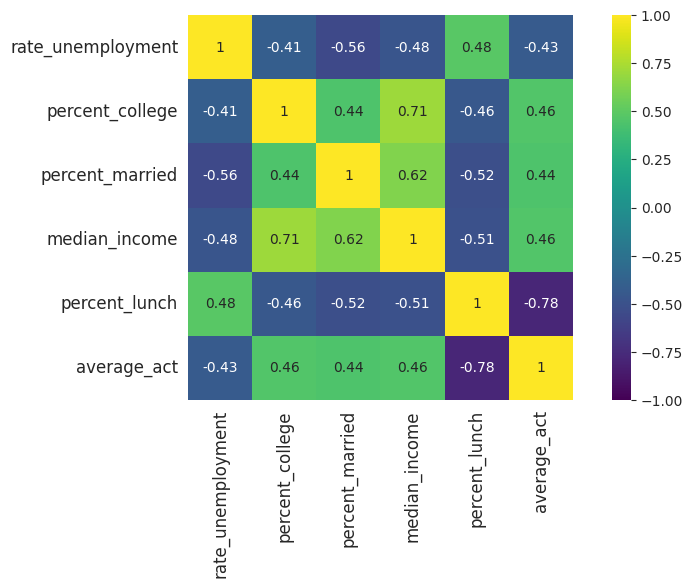

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'charter']

numerical_predictors = clean_df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = clean_df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

There is a strong correlation between percent lunch and average ACT score.

##### Make pair plots to explore relationships between the variables

<Figure size 500x500 with 0 Axes>

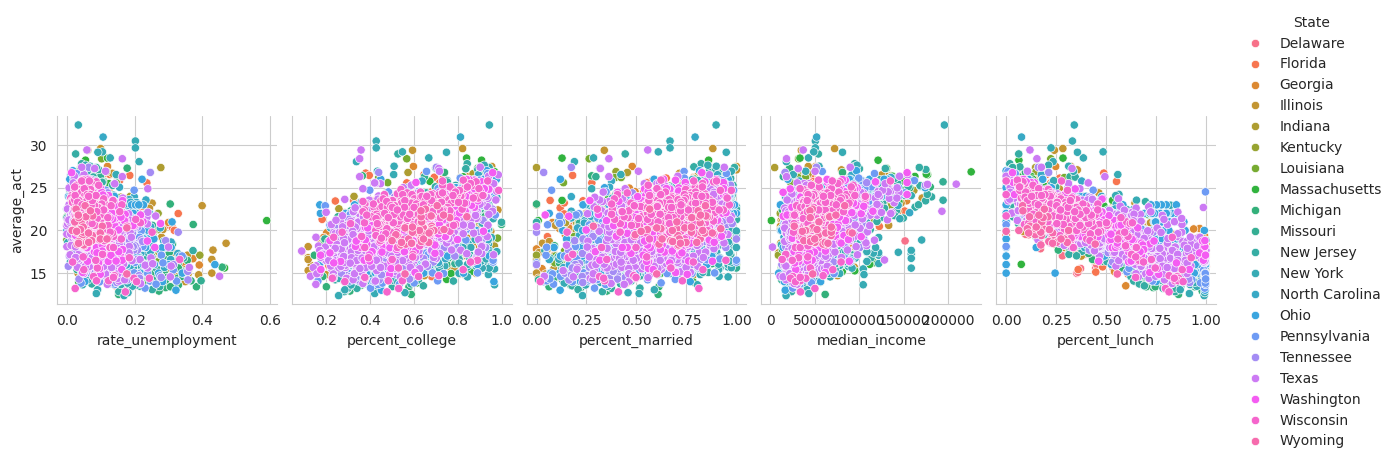

In [170]:
fig = sns.pairplot(
    data=clean_df,
    vars=numerical_predictors + ['average_act'],
    hue='State',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

### Identify outliers

Use the interquartile range to identify outliers and examine the box plot

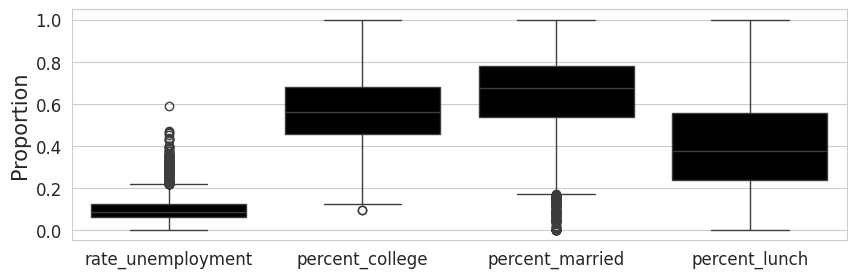

In [135]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=clean_df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

There are more outliers for the unemployment rate

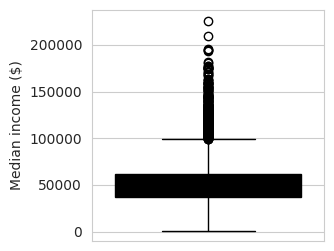

In [136]:
plt.figure(figsize=(3,3))

sns.boxplot(data=clean_df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

## Summary

1.  The numerical predictors are related to `average_act`. The relationships appear roughly linear.

2.  The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

3.  Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

4. There are outliers in `rate_unemployment`, `percent_college`, `percent_married` and `median_income`. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

# Modeling

##Assessment of States

Create a model including categorical data from states

In [176]:
model_state = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + C(State)',
    data=df).fit()

In [177]:
print(model_state.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     693.1
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:26:57   Log-Likelihood:                -12793.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7204   BIC:                         2.579e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The reference state in this context is Delaware. The coef is comparing the difference of each state to Delaware.

Create a residual plot of the state model

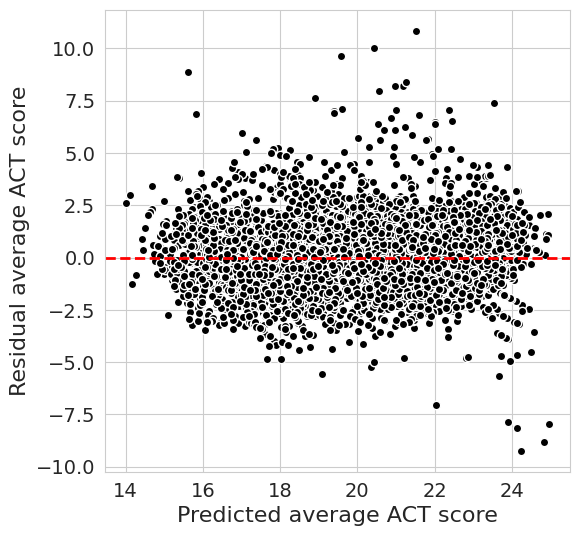

In [178]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_state.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Take the mean absolute error of the model

In [179]:
mean_absolute_error(df['average_act'], model_state.predict())

1.0277533349716133

Creating a model where the intercept and slope can vary between schools based on state

In [180]:
model_state2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(State)', data=df).fit()

In [181]:
print(model_state2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     219.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:27:13   Log-Likelihood:                -12449.
No. Observations:                7227   AIC:                         2.506e+04
Df Residuals:                    7147   BIC:                         2.561e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

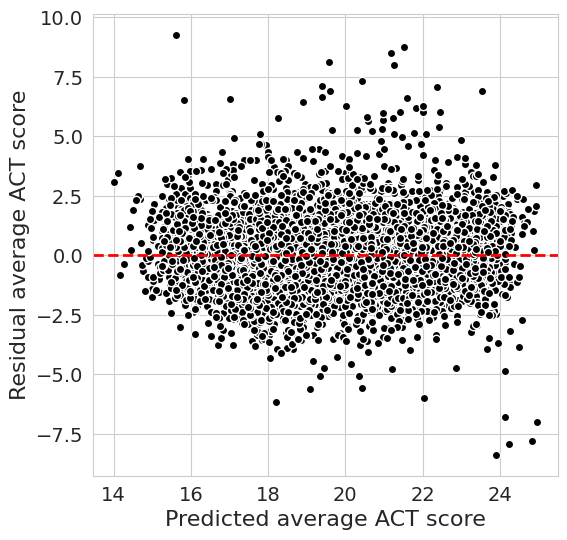

In [182]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_state2.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Use an anova test to test significance between models

In [183]:
anova_lm(model_state, model_state2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7204.0,14587.976956,0.0,NaN,NaN,NaN
1,7147.0,13264.174936,57.0,1323.802019,12.513872,5.437743e-108


Compute the mean absolute error

In [188]:
mean_absolute_error(df['average_act'], model_state.predict())

1.0277533349716133

Compare to the intercept model

In [189]:
mean_absolute_error(df['average_act'], model_state2.predict())

0.9967179199652629

The intercept model has a smaller mean absolute error than the original model

### Single input models

# Multiple linear regression

Fit the multiple linear regression model using all socioeconomic variables as predictors.

In [190]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + C(State) + median_income + percent_lunch',
    data=clean_df).fit()
    #C(State) is treated as a categorical variable

##### Print the summary

In [191]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     635.2
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:30:20   Log-Likelihood:                -12793.
No. Observations:                7227   AIC:                         2.564e+04
Df Residuals:                    7202   BIC:                         2.581e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

##### Use a residual plot for graphical assessment of model fit

In [192]:
y_hat = model.predict()

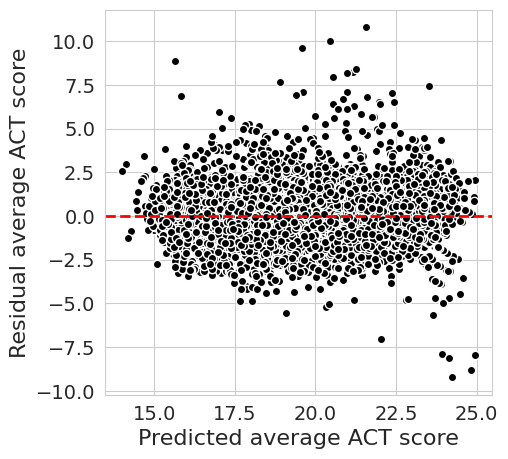

In [141]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

##### Compute the mean absolute error

In [193]:
mean_absolute_error(df['average_act'], model.predict())

1.0278330737229213

# Fit a reduced model with the significant predictors

In [168]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + C(State) + percent_college + percent_lunch',
    data=df).fit()

##### Print the summary

In [169]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     693.1
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:16:09   Log-Likelihood:                -12793.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7204   BIC:                         2.579e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

##### Use a residual plot for graphical assessment of model fit

In [151]:
y_hat = model_reduced.predict()

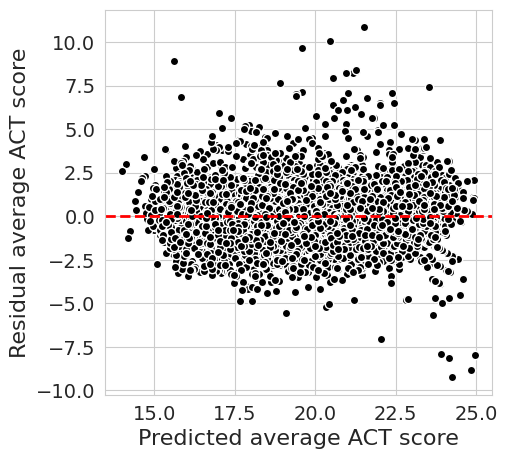

In [152]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

##### Compute the mean absolute error

In [194]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.0277533349716133

## Summary

# Conclusion

The analysis shows that college entrance test scores (ACT and SAT) are related to socioeconomic variables as well as location (State)

In particular, using only the percent of students at a school receiving free or reduced price lunch, we can predict ACT scores to within a single point, on average.

The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis. It was also the only variable measured for students at the school, rather than for the neighborhood. It is an open question how important the other predictors would be if they were measured for the students at the school, rather than for the neighborhood.


Whether a student received aid for lunch was the greatest factor in impacting their ACT score as opposed to their location. Only the state of New York displayed statistical significance in ACT score differences in comparison to the state of Delaware. Future analysis may include having the average ACT score in the entire U.S be the reference state for comparison instead of Delaware. While location and environment are factors that do shape children, the reality is that if student is not well-nourished, they will not have the energy to thoughtfully take assessments.


